In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.linalg import eig
from scipy.linalg import eigh
def k(ik,jk,nk=9):
  return ik*nk +jk

def i(ki,ni=9):
  return ki//ni

def j(kj,nj=9):
  return kj%nj

def x(ix,a,nx=9):
  dxx= 2*a/(nx-1)
  return -a+dxx*ix

def y(jy,a,ny=9):
  dyy= 2*a/(ny-1)
  return -a+dyy*jy

def f1(k1,k2,a1,n1,alpha_x1,alpha_y1):
  x0=x(i(k1,n1),a1,n1)
  y0=y(j(k1,n1),a1,n1)
  x1=x(i(k2,n1),a1,n1)
  y1=y(j(k2,n1),a1,n1)
  return 1/(alpha_x1*np.pi)**(1/4) *np.exp(-(x1-x0)**2/(2*alpha_x1))*1/(alpha_y1*np.pi)**(1/4) *np.exp(-(y1-y0)**2/(2*alpha_y1))

def S_el(ki,kj,a_s,alpha_xs,alpha_ys,ns=9):
  xi=x(i(ki,ns),a_s,ns)
  yi=y(j(ki,ns),a_s,ns)
  xj=x(i(kj,ns),a_s,ns)
  yj=y(j(kj,ns),a_s,ns)
#   print(xi, yi, xj, yj)
  return np.exp(-(xi-xj)**2/(4*alpha_xs)-(yi-yj)**2/(4*alpha_ys))

def S(a_s1,alpha_xs1,alpha_ys1,ns1=9):
  S_out = np.zeros((ns1**2,ns1**2))
  for i_s in range(ns1**2):
    for j_s in range(ns1**2):
      S_out[i_s,j_s] = S_el(i_s,j_s,a_s1,alpha_xs1,alpha_ys1,ns1)
  return S_out


def K(a_k,alpha_xk,alpha_yk,mk,nk=9):
  K_out = np.zeros((nk**2,nk**2))
  tab_s = S(a_k,alpha_xk,alpha_yk,nk)
  for i_k in range(nk**2):
    for j_k in range(nk**2):
      xi=x(i(i_k,nk),a_k,nk)
      yi=y(j(i_k,nk),a_k,nk)
      xj=x(i(j_k,nk),a_k,nk)
      yj=y(j(j_k,nk),a_k,nk)
      K_out[i_k,j_k] = -tab_s[i_k,j_k]/(2*mk)*(((xi-xj)**2-(2*alpha_xk))/(4*alpha_xk**2)+   ((yi-yj)**2-(2*alpha_yk))/(4*alpha_yk**2))
  return K_out

def V(a_v,alpha_xv,alpha_yv,mv,om_xv,om_yv,nv=9):
    V_out = np.zeros((nv**2,nv**2))
    tab_s = S(a_v,alpha_xv,alpha_yv,nv)
    for i_v in range(nv**2):
      for j_v in range(nv**2):
        xi=x(i(i_v,nv),a_v,nv)
        yi=y(j(i_v,nv),a_v,nv)
        xj=x(i(j_v,nv),a_v,nv)
        yj=y(j(j_v,nv),a_v,nv)
        V_out[i_v,j_v] = tab_s[i_v,j_v]*mv/2*(om_xv**2*((xi+xj)**2+(2*alpha_xv))/4+   om_yv**2*((yi+yj)**2+(2*alpha_yv))/4)
    return V_out

def H(a_h,alpha_xh,alpha_yh,mh,om_xh,om_yh,nh=9):
  vtemp = V(a_h,alpha_xh,alpha_yh,mh,om_xh,om_yh,nh)
  ktemp = K(a_h,alpha_xh,alpha_yh,mh,nh)
  outh = ktemp + vtemp
  return outh

def eigv(He,Se,le,he):
#   vals, vecs= eig(He,b=Se)
#   vals = np.sort(vals)
#   idx = np.argsort(vals)
#   vecs = vecs[:,idx]
  vals = eigh(He,b=Se,eigvals_only=True,subset_by_index= [le,he])
  return vals

def eigvecs(Hv,Sv):
  vals, vecs = eigh(Hv,b=Sv)
  return vecs

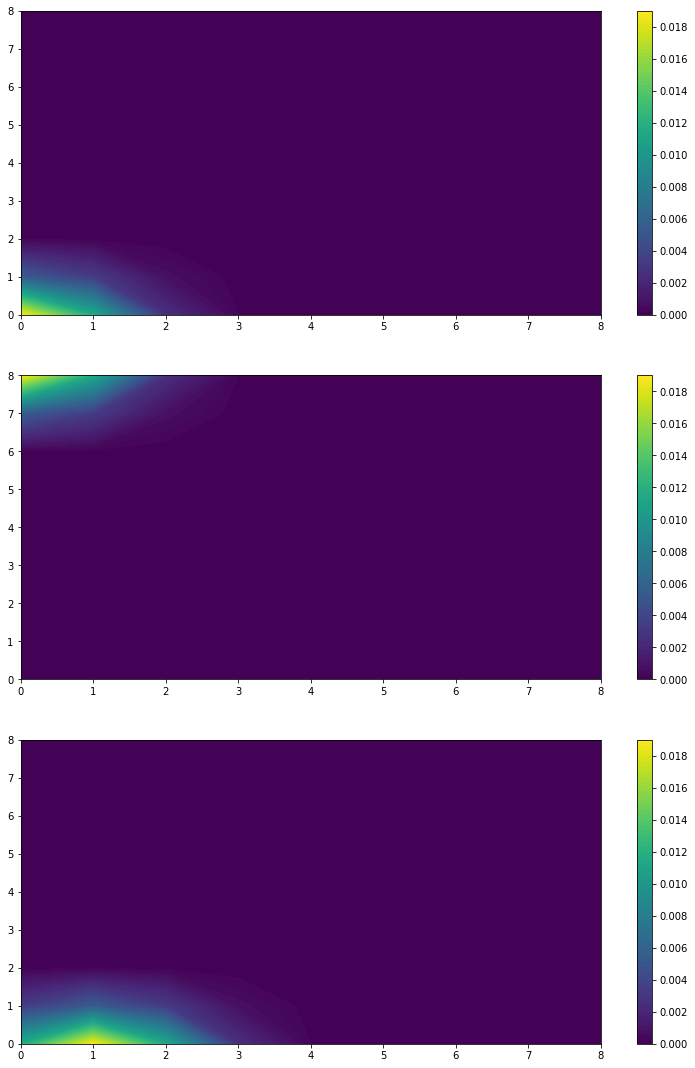

In [ ]:
n=9
dx = 2 #nm
dx = dx/0.052918
a= (n-1)*dx/2
Eh = 27.211
om_x = 0.08/Eh
om_y = 0.2/Eh
m = 0.24
alpha_x =1/(m*om_x)
alpha_y =1/(m*om_y)
N=int(n**2)
web0 = np.zeros((n,n))
web8 = np.zeros((n,n))
web9 = np.zeros((n,n))


for k in range(N):
  web0[i(k,n),j(k,n)]= f1(0,k,a,n,alpha_x,alpha_y)
  web8[i(k,n),j(k,n)]= f1(8,k,a,n,alpha_x,alpha_y)
  web9[i(k,n),j(k,n)]= f1(9,k,a,n,alpha_x,alpha_y)



fig, axs = plt.subplots(3,1,figsize=(13,19))


plt.sca(axs[0])
plt.contourf(np.transpose(web0),100)
plt.colorbar()

plt.sca(axs[1])
plt.contourf(np.transpose(web8),100)
plt.colorbar()

plt.sca(axs[2])
plt.contourf(np.transpose(web9),100)
plt.colorbar()

plt.show()

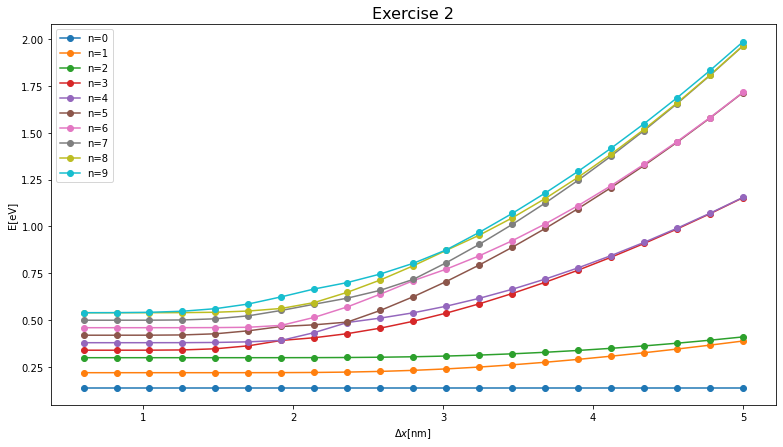

In [ ]:
n=9


Eh = 27.211
om_x = 0.08/Eh
om_y = 0.2/Eh
m = 0.24
alpha_x = 1/(m*om_x)
alpha_y = 1/(m*om_y)
N = int(n**2)
l_e = 0
h_e = 9

min_dx = 0.6
max_dx = 5
n_dx = 21
out_dx = np.zeros((10,n_dx))

Dxs = np.linspace(min_dx,max_dx,n_dx)
iind=0
for dx in Dxs:
  a = (n-1)*(dx/0.052918)/2

  out_dx[:,iind]= eigv(H(a,alpha_x,alpha_y,m,om_x,om_y,n),S(a,alpha_x,alpha_y,n),l_e,h_e)[:10]
  iind = iind+ 1

out_dx *= Eh

fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_ylabel('E[eV]')
ax.set_xlabel(r'$\Delta x$[nm]')
ax.set_title(r'Exercise 2', fontsize = 16)



for l in range(10):
    ax.plot(Dxs, out_dx[l,:],'-o',label = f'n={l}') #zwykły plot
#     ax.plot(np.arange(n_dx), out_dx[l,:]*Eh,label = f'n={l}') #zwykły plot

plt.legend()

plt.show()

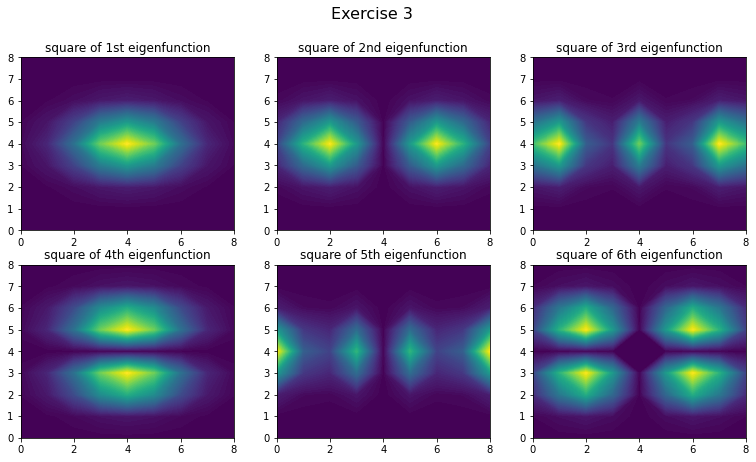

In [ ]:
n=9
dx = 1 #nm
dx = dx/0.052918
a= (n-1)*dx/2
Eh = 27.211
om_x = 0.08/Eh
om_y = 0.2/Eh
m = 0.24
alpha_x =1/(m*om_x)
alpha_y =1/(m*om_y)
N=int(n**2)


vectors = np.zeros((N,N))

vectors = eigvecs(H(a,alpha_x,alpha_y,m,om_x,om_y,n),S(a,alpha_x,alpha_y,n))

functions = np.zeros((6,n,n))
for num in range(6):
  for k_1 in range(N):
    for k_0 in range(N):
      functions[num,i(k_1,n),j(k_1,n)] += vectors[k_0,num] *  f1(k_0,k_1,a,n,alpha_x,alpha_y)
functions = functions**2


fig, axs = plt.subplots(2,3,figsize=(13,7))
fig.suptitle('Exercise 3',fontsize = 16)

plt.sca(axs[0,0])
plt.title('square of 1st eigenfunction')
plt.contourf(np.transpose(functions[0,:,:]),100)


plt.sca(axs[0,1])
plt.title('square of 2nd eigenfunction')
plt.contourf(np.transpose(functions[1,:,:]),100)



plt.sca(axs[0,2])
plt.title('square of 3rd eigenfunction')
plt.contourf(np.transpose(functions[2,:,:]),100)



plt.sca(axs[1,0])
plt.title('square of 4th eigenfunction')
plt.contourf(np.transpose(functions[3,:,:]),100)



plt.sca(axs[1,1])
plt.title('square of 5th eigenfunction')
plt.contourf(np.transpose(functions[4,:,:]),100)



plt.sca(axs[1,2])
plt.title('square of 6th eigenfunction')
plt.contourf(np.transpose(functions[5,:,:]),100)

plt.show()

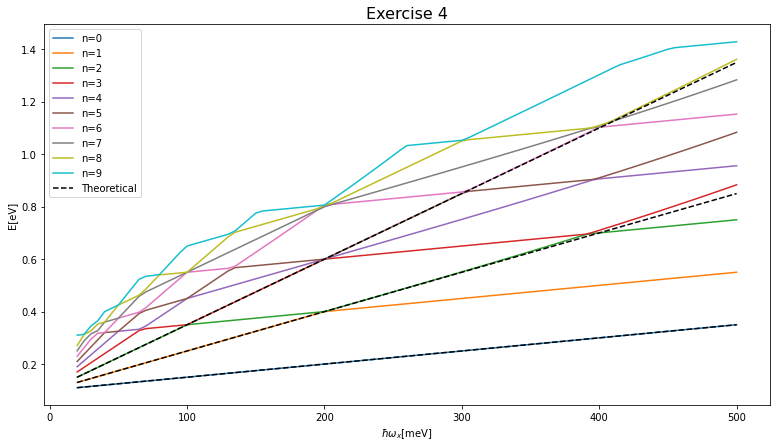

In [ ]:
n=9
dx = 1 #nm
dx = dx/0.052918
a= (n-1)*dx/2
Eh = 27.211

om_y = 0.2/Eh
m = 0.24

alpha_y =1/(m*om_y)
N=int(n**2)

out = np.zeros((10,97))
for iter_om in range(4,101):
  om_x = iter_om*0.005/Eh
  alpha_x =1/(m*om_x)

  out[:,iter_om-4]=eigv(H(a,alpha_x,alpha_y,m,om_x,om_y,n),S(a,alpha_x,alpha_y,n),l_e,h_e)[:10]

out *= Eh

oms = np.linspace(20,500,97)
fig = plt.figure(figsize=(13,7))  #konfiguracja wykresu
ax = fig.add_subplot(111)
ax.set_ylabel('E[eV]')
ax.set_xlabel(r'$\hbar \omega_x$[meV]')
ax.set_title(r'Exercise 4', fontsize = 16)


for l in range(10):
    ax.plot(oms, out[l,:],label = f'n={l}') #zwykły plot
#     ax.plot(np.arange(n_dx), out_dx[l,:]*Eh,label = f'n={l}') #zwykły plot


tab_teor_0 = oms*(1/2)/1000 +0.1
ax.plot(oms, tab_teor_0,'--',label = f'Theoretical',c='k') #zwykły plot

tab_teor_1 = oms*(3/2)/1000 +0.1
ax.plot(oms, tab_teor_1,'--',c='k') #zwykły plot

tab_teor_2 = oms*(5/2)/1000 +0.1
ax.plot(oms, tab_teor_2,'--',c='k') #zwykły plot

plt.legend()

plt.show()

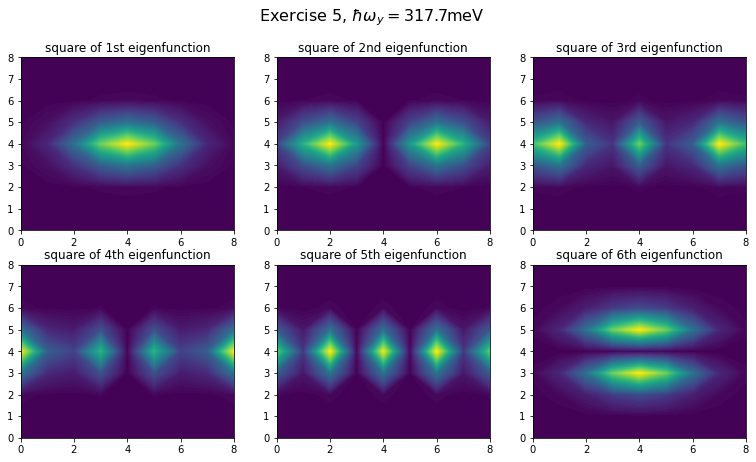

In [ ]:
n=9
dx = 1 #nm
dx = dx/0.052918
a= (n-1)*dx/2
Eh = 27.211
om_x = 0.08/Eh
om_y = 0.3177/Eh
m = 0.24
alpha_x =1/(m*om_x)
alpha_y =1/(m*om_y)
N=int(n**2)


vectors = np.zeros((N,N))

vectors = eigvecs(H(a,alpha_x,alpha_y,m,om_x,om_y,n),S(a,alpha_x,alpha_y,n))

functions = np.zeros((6,n,n))
for num in range(6):
  for k_1 in range(N):
    for k_0 in range(N):
      functions[num,i(k_1,n),j(k_1,n)] += vectors[k_0,num] *  f1(k_0,k_1,a,n,alpha_x,alpha_y)
functions = functions**2


fig, axs = plt.subplots(2,3,figsize=(13,7))

fig.suptitle(r'Exercise 5, $\hbar \omega_y =$'+ f'{om_y*Eh*1000}meV',fontsize = 16)

plt.sca(axs[0,0])
plt.title('square of 1st eigenfunction')
plt.contourf(np.transpose(functions[0,:,:]),100)


plt.sca(axs[0,1])
plt.title('square of 2nd eigenfunction')
plt.contourf(np.transpose(functions[1,:,:]),100)



plt.sca(axs[0,2])
plt.title('square of 3rd eigenfunction')
plt.contourf(functions[2,:,:].T,100)



plt.sca(axs[1,0])
plt.title('square of 4th eigenfunction')
plt.contourf(functions[3,:,:].T,100)



plt.sca(axs[1,1])
plt.title('square of 5th eigenfunction')
plt.contourf(functions[4,:,:].T,100)



plt.sca(axs[1,2])
plt.title('square of 6th eigenfunction')
plt.contourf(functions[5,:,:].T,100)

plt.show()